In [1]:
# 1. 필요한 라이브러리 import
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2. PositionalEmbedding 클래스 정의
class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEmbedding, self).__init__()
        
        pe = torch.zeros(max_len, d_model).float()
        pe.require_grad = False
        
        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
    
    def forward(self, x):
        return self.pe[:, :x.size(1)]

In [3]:
# 3. div_term 계산 과정 확인
positions = torch.arange(0, 10, 2)  # 처음 5개만 확인
constant = -(math.log(10000.0) / 512)
print("Positions:", positions)
print("Multiplied:", positions * constant)
print("Final div_term:", torch.exp(positions * constant))

Positions: tensor([0, 2, 4, 6, 8])
Multiplied: tensor([-0.0000, -0.0360, -0.0720, -0.1079, -0.1439])
Final div_term: tensor([1.0000, 0.9647, 0.9306, 0.8977, 0.8660])


In [4]:
# 4. 작은 예시로 sin/cos 적용 과정 확인
small_position = torch.arange(0, 3).float().unsqueeze(1)  # [3, 1]
small_div_term = torch.exp(torch.arange(0, 6, 2).float() * -(math.log(10000.0) / 512))  # [3]

# 실제 계산 과정
result = small_position * small_div_term
print("\nPosition:", small_position.shape)
print("Div_term:", small_div_term.shape)
print("Result:", result.shape)

# sin/cos 적용
pe_small = torch.zeros(3, 6)
pe_small[:, 0::2] = torch.sin(result)
pe_small[:, 1::2] = torch.cos(result)
print("Final PE shape:", pe_small.shape)


Position: torch.Size([3, 1])
Div_term: torch.Size([3])
Result: torch.Size([3, 3])
Final PE shape: torch.Size([3, 6])


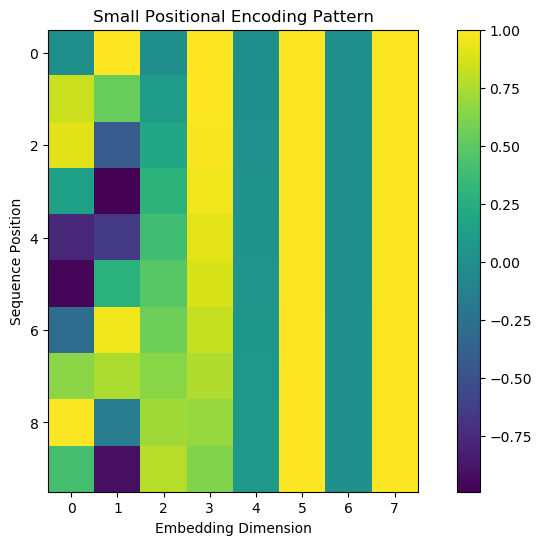

In [5]:
# 5. 작은 크기의 포지셔널 인코딩 시각화
def visualize_small_pe():
    d_model = 8  # 작은 크기
    max_len = 10

    pe = torch.zeros(max_len, d_model)
    position = torch.arange(0, max_len).float().unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
    
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(pe.numpy())
    plt.colorbar()
    plt.title('Small Positional Encoding Pattern')
    plt.xlabel('Embedding Dimension')
    plt.ylabel('Sequence Position')
    plt.show()

visualize_small_pe()

Position shape: torch.Size([300, 1])
Position values:
 tensor([[  0.],
        [  1.],
        [  2.],
        [  3.],
        [  4.],
        [  5.],
        [  6.],
        [  7.],
        [  8.],
        [  9.],
        [ 10.],
        [ 11.],
        [ 12.],
        [ 13.],
        [ 14.],
        [ 15.],
        [ 16.],
        [ 17.],
        [ 18.],
        [ 19.],
        [ 20.],
        [ 21.],
        [ 22.],
        [ 23.],
        [ 24.],
        [ 25.],
        [ 26.],
        [ 27.],
        [ 28.],
        [ 29.],
        [ 30.],
        [ 31.],
        [ 32.],
        [ 33.],
        [ 34.],
        [ 35.],
        [ 36.],
        [ 37.],
        [ 38.],
        [ 39.],
        [ 40.],
        [ 41.],
        [ 42.],
        [ 43.],
        [ 44.],
        [ 45.],
        [ 46.],
        [ 47.],
        [ 48.],
        [ 49.],
        [ 50.],
        [ 51.],
        [ 52.],
        [ 53.],
        [ 54.],
        [ 55.],
        [ 56.],
        [ 57.],
        [ 58.],
 

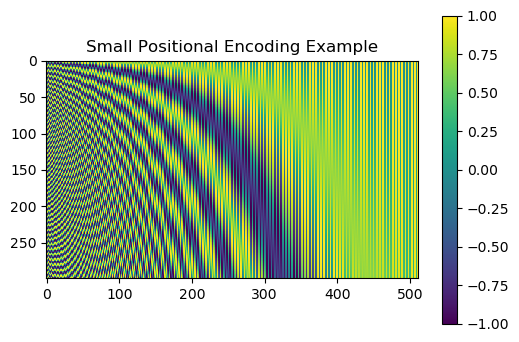

In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# 간단한 테스트
d_model = 512
seq_len = 300

# 포지션 벡터 생성
position = torch.arange(0, seq_len).float().unsqueeze(1)
print("Position shape:", position.shape)
print("Position values:\n", position)

# div_term 계산
div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(1000.0) / d_model))
print("\nDiv_term shape:", div_term.shape)
print("Div_term values:\n", div_term)

# 작은 PE 매트릭스 생성
pe = torch.zeros(seq_len, d_model)
pe[:, 0::2] = torch.sin(position * div_term)
pe[:, 1::2] = torch.cos(position * div_term)

# 시각화
plt.figure(figsize=(6, 4))
plt.imshow(pe.numpy())
plt.colorbar()
plt.title('Small Positional Encoding Example')
plt.show()

In [5]:
import torch

# 예시를 위해 작은 차원으로 시현
other_embedding = torch.ones(32, 4, 8)  # [32, 4, 8]
pos_encoding = torch.zeros(1, 4, 8)     # [1, 4, 8]

# 각 위치에 다른 값 할당
for i in range(4):
    pos_encoding[0, i] = i + 1

print("Other Embedding 첫번째 배치:")
print(other_embedding[0])
print("\nPositional Encoding:")
print(pos_encoding[0])

# 브로드캐스팅 덧셈
result = other_embedding + pos_encoding
print("\n결과의 첫번째 배치:")
print(result[0])
print("\n결과 shape:", result.shape)

Other Embedding 첫번째 배치:
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

Positional Encoding:
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3., 3., 3., 3.],
        [4., 4., 4., 4., 4., 4., 4., 4.]])

결과의 첫번째 배치:
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3., 3., 3., 3.],
        [4., 4., 4., 4., 4., 4., 4., 4.],
        [5., 5., 5., 5., 5., 5., 5., 5.]])

결과 shape: torch.Size([32, 4, 8])


In [ ]:
result.size()

# FixedEmbedding

In [6]:
class FixedEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(FixedEmbedding, self).__init__()

        w = torch.zeros(c_in, d_model).float()
        w.require_grad = False

        position = torch.arange(0, c_in).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float()
                    * -(math.log(10000.0) / d_model)).exp()

        w[:, 0::2] = torch.sin(position * div_term)
        w[:, 1::2] = torch.cos(position * div_term)

        self.emb = nn.Embedding(c_in, d_model)
        self.emb.weight = nn.Parameter(w, requires_grad=False)

    def forward(self, x):
        return self.emb(x).detach()    


In [11]:
# 작은 크기로 테스트
fixed_emb = FixedEmbedding(c_in=24, d_model=8)
x = torch.randint(0, 24, (2, 3, 2))  # 작은 크기의 예시

print("입력 shape:", x.shape)          # torch.Size([2, 3, 2])
print("출력 shape:", fixed_emb(x).shape)  # torch.Size([2, 3, 2, 8])

# 입력 데이터 예시
print("\n입력 데이터:")
print(x)

# 출력 데이터 첫 번째 임베딩 예시
print("\n출력 데이터 (첫 번째 배치, 첫 번째 시퀀스, 첫 번째 특성의 임베딩):")
print(fixed_emb(x)[0,0,0])

입력 shape: torch.Size([2, 3, 2])
출력 shape: torch.Size([2, 3, 2, 8])

입력 데이터:
tensor([[[ 2, 15],
         [ 1,  0],
         [ 9,  4]],

        [[20, 11],
         [12, 17],
         [11,  0]]])

출력 데이터 (첫 번째 배치, 첫 번째 시퀀스, 첫 번째 특성의 임베딩):
tensor([ 0.9093, -0.4161,  0.1987,  0.9801,  0.0200,  0.9998,  0.0020,  1.0000])


In [12]:
# 시간(hour) 임베딩의 경우
hour_embed = FixedEmbedding(c_in=24, d_model=512)

# 입력 예시
x = torch.tensor([0, 5, 23])  # 0시, 5시, 23시
# 각 시간값은 0~23 사이의 값이어야 함 (c_in=24이므로)

output = hour_embed(x)  # 각 시간값이 512차원 벡터로 변환

In [15]:
output.size()

torch.Size([3, 512])

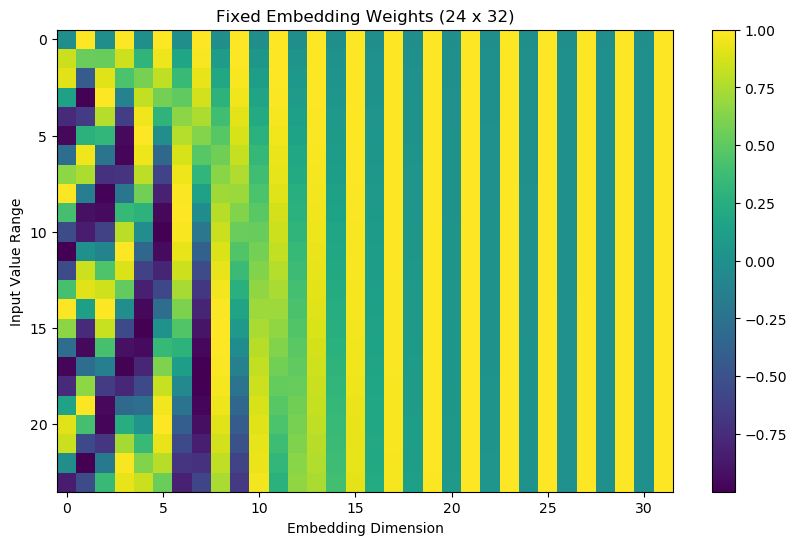

In [16]:
import matplotlib.pyplot as plt

def visualize_fixed_embedding(c_in=24, d_model=32):
    embed = FixedEmbedding(c_in, d_model)
    weights = embed.emb.weight.detach().numpy()
    
    plt.figure(figsize=(10, 6))
    plt.imshow(weights)
    plt.colorbar()
    plt.title(f'Fixed Embedding Weights ({c_in} x {d_model})')
    plt.xlabel('Embedding Dimension')
    plt.ylabel('Input Value Range')
    plt.show()

# 시각화 예시
visualize_fixed_embedding(24, 32)  # 시간 임베딩 예시

In [19]:
class TemporalEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='fixed', freq='h'):
        super(TemporalEmbedding, self).__init__()

        minute_size = 4
        hour_size = 24
        weekday_size = 7
        day_size = 32
        month_size = 13

        Embed = FixedEmbedding if embed_type == 'fixed' else nn.Embedding
        if freq == 't':
            self.minute_embed = Embed(minute_size, d_model)
        self.hour_embed = Embed(hour_size, d_model)
        self.weekday_embed = Embed(weekday_size, d_model)
        self.day_embed = Embed(day_size, d_model)
        self.month_embed = Embed(month_size, d_model)

    def forward(self, x):
        x = x.long()
        minute_x = self.minute_embed(x[:, :, 4]) if hasattr(
            self, 'minute_embed') else 0.
        hour_x = self.hour_embed(x[:, :, 3])
        weekday_x = self.weekday_embed(x[:, :, 2])
        day_x = self.day_embed(x[:, :, 1])
        month_x = self.month_embed(x[:, :, 0])

        return hour_x + weekday_x + day_x + month_x + minute_x

In [20]:
class TimeFeatureEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='timeF', freq='h'):
        super(TimeFeatureEmbedding, self).__init__()

        freq_map = {'h': 4, 't': 5, 's': 6,
                    'm': 1, 'a': 1, 'w': 2, 'd': 3, 'b': 3}
        d_inp = freq_map[freq]
        self.embed = nn.Linear(d_inp, d_model, bias=False)

    def forward(self, x):
        return self.embed(x)


# TokenEmbedding

In [22]:
class TokenEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(TokenEmbedding, self).__init__()
        padding = 1 if torch.__version__ >= '1.5.0' else 2
        self.tokenConv = nn.Conv1d(in_channels=c_in, out_channels=d_model,
                                   kernel_size=3, padding=padding, padding_mode='circular', bias=False)
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(
                    m.weight, mode='fan_in', nonlinearity='leaky_relu')

    def forward(self, x):
        x = self.tokenConv(x.permute(0, 2, 1)).transpose(1, 2)
        return x


원본 shape: torch.Size([1, 5, 2])
Permuted shape: torch.Size([1, 2, 5])


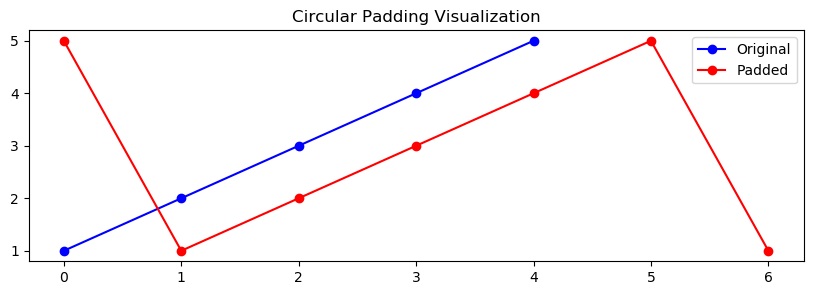

최종 출력 shape: torch.Size([1, 5, 4])


In [23]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 간단한 예시
c_in = 2
d_model = 4
seq_len = 5

# TokenEmbedding 생성
token_emb = TokenEmbedding(c_in, d_model)

# 입력 데이터
x = torch.randn(1, seq_len, c_in)  # [batch_size=1, seq_len=5, c_in=2]

# 1. 데이터 변환 과정
x_permuted = x.permute(0, 2, 1)    # [1, 2, 5]
print("원본 shape:", x.shape)
print("Permuted shape:", x_permuted.shape)

# 2. Circular padding 시각화
def visualize_circular_padding():
    # 단순화된 1D 예시
    x = torch.tensor([1, 2, 3, 4, 5]).float()
    # padding 적용
    padded = torch.cat([x[-1:], x, x[:1]])
    
    plt.figure(figsize=(10, 3))
    plt.plot(x.numpy(), 'bo-', label='Original')
    plt.plot(padded.numpy(), 'ro-', label='Padded')
    plt.legend()
    plt.title('Circular Padding Visualization')
    plt.show()

visualize_circular_padding()

# 3. 최종 출력
output = token_emb(x)
print("최종 출력 shape:", output.shape)  # [1, 5, 4]

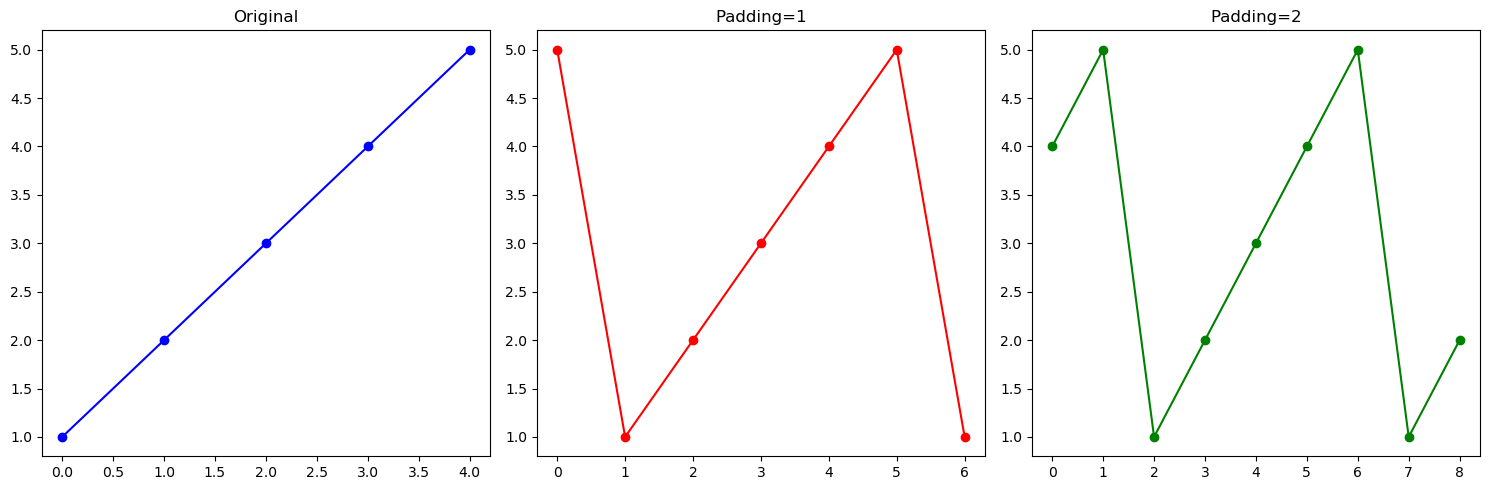

In [24]:
import torch
import torch.nn as nn

# 1D 컨볼루션 예시
conv = nn.Conv1d(
    in_channels=1,
    out_channels=1,
    kernel_size=3,
    padding=1,
    padding_mode='circular'
)

# 입력 데이터
x = torch.tensor([1, 2, 3, 4, 5]).float()
x = x.view(1, 1, -1)  # [batch, channel, length]

# padding=1인 경우의 실제 연산
"""
입력 패딩 후: [5, 1, 2, 3, 4, 5, 1]
윈도우1: [5, 1, 2] -> 출력1
윈도우2: [1, 2, 3] -> 출력2
윈도우3: [2, 3, 4] -> 출력3
윈도우4: [3, 4, 5] -> 출력4
윈도우5: [4, 5, 1] -> 출력5
"""

# 시각화
def visualize_padding():
    import matplotlib.pyplot as plt
    
    # 원본 데이터
    original = [1, 2, 3, 4, 5]
    
    # padding=1
    padded1 = [5, 1, 2, 3, 4, 5, 1]
    
    # padding=2
    padded2 = [4, 5, 1, 2, 3, 4, 5, 1, 2]
    
    plt.figure(figsize=(15, 5))
    
    # 원본
    plt.subplot(131)
    plt.plot(original, 'bo-')
    plt.title('Original')
    
    # padding=1
    plt.subplot(132)
    plt.plot(padded1, 'ro-')
    plt.title('Padding=1')
    
    # padding=2
    plt.subplot(133)
    plt.plot(padded2, 'go-')
    plt.title('Padding=2')
    
    plt.tight_layout()
    plt.show()

visualize_padding()

In [25]:
class WeatherTokenEmbedding(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv1d(
            in_channels=3,
            out_channels=4,
            kernel_size=3,
            padding=1,
            padding_mode='circular'
        )
    
    def forward(self, x):
        return self.conv(x.permute(0, 2, 1)).transpose(1, 2)

# 테스트 데이터
weather_data = torch.tensor([
    # 시퀀스 1: 맑은 날씨에서 비로 변하는 패턴
    [[25, 50, 1015],  # 맑음
     [26, 60, 1012],  # 구름 증가
     [24, 75, 1008]], # 비
    
    # 시퀀스 2: 더운 날씨가 지속되는 패턴
    [[29, 65, 1013],
     [31, 70, 1012],
     [30, 75, 1011]]
], dtype=torch.float32)

model = WeatherTokenEmbedding()
output = model(weather_data)

print("입력 shape:", weather_data.shape)    # [2, 3, 3]
print("출력 shape:", output.shape)          # [2, 3, 4]

입력 shape: torch.Size([2, 3, 3])
출력 shape: torch.Size([2, 3, 4])
